In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
with warnings.catch_warnings(): warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

# Concatenate dataset_3 with merged_df_outer

In [64]:
# Concatenate dataset_3 with merged_df_outer
dataset_3 = pd.read_excel('dataset_3.xlsx')
merged_dataset_outer = pd.read_excel('merged_dataset_outer.xlsx') 
combined_df = pd.merge(merged_dataset_outer, dataset_3, on='instant', how='outer')
combined_df=pd.read_excel('combined_df.xlsx')
# Display the first few rows of the combined dataset
print(combined_df.head())



   instant  season_x  yr_x  mnth_x  hr_x  holiday_x  weekday_x  weathersit_x  \
0        1         1     0       1     0      False          6             1   
1        2         1     0       1     1      False          6             1   
2        3         1     0       1     2      False          6             1   
3        4         1     0       1     3      False          6             1   
4        5         1     0       1     4      False          6             1   

   temp_x  rolling_temp  ...  weekday_y  weathersit_y  temp_y  atemp_y  hum_y  \
0    0.24      0.196041  ...          3             1    0.22   0.2273    0.6   
1    0.22      0.271429  ...          3             1    0.22   0.2273    0.6   
2    0.22      0.391429  ...          3             1    0.22   0.2273    0.6   
3    0.24      0.360000  ...          3             1    0.22   0.2273    0.6   
4    0.24      0.328571  ...          3             1    0.22   0.2273    0.6   

   windspeed_y casual_y register

In [52]:
combined_df.to_csv('combined_df.csv', index=False)

# Find missing values

In [66]:
# Fill missing numeric values with the median
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
combined_df[numeric_cols] = combined_df[numeric_cols].fillna(combined_df[numeric_cols].median())

# Fill missing categorical values with the mode
categorical_cols = combined_df.select_dtypes(include=['object']).columns
combined_df[categorical_cols] = combined_df[categorical_cols].fillna(combined_df[categorical_cols].mode().iloc[0])

# Verify missing values are handled
print("Missing Values After Handling:\n", combined_df.isnull().sum())


Missing Values After Handling:
 instant           0
season_x          0
yr_x              0
mnth_x            0
hr_x              0
holiday_x         0
weekday_x         0
weathersit_x      0
temp_x            0
rolling_temp      0
atemp_x           0
hum_x             0
windspeed_x       0
casual_x          0
registered_x      0
cnt_x             0
hum_bins          0
windspeed_bins    0
season_y          0
yr_y              0
mnth_y            0
hr_y              0
holiday_y         0
weekday_y         0
weathersit_y      0
temp_y            0
atemp_y           0
hum_y             0
windspeed_y       0
casual_y          0
registered_y      0
cnt_y             0
dteday            0
dtype: int64


In [24]:
print(combined_df.isnull().sum())

instant           0
season_x          0
yr_x              0
mnth_x            0
hr_x              0
holiday_x         0
weekday_x         0
weathersit_x      0
temp_x            0
rolling_temp      0
atemp_x           0
hum_x             0
windspeed_x       0
casual_x          0
registered_x      0
cnt_x             0
hum_bins          0
windspeed_bins    0
season_y          0
yr_y              0
mnth_y            0
hr_y              0
holiday_y         0
weekday_y         0
weathersit_y      0
temp_y            0
atemp_y           0
hum_y             0
windspeed_y       0
casual_y          0
registered_y      0
cnt_y             0
dteday            0
dtype: int64


In [26]:
print(combined_df.head())

   instant  season_x  yr_x  mnth_x  hr_x  holiday_x  weekday_x  weathersit_x  \
0        1       1.0   0.0     1.0   0.0      False        6.0           1.0   
1        2       1.0   0.0     1.0   1.0      False        6.0           1.0   
2        3       1.0   0.0     1.0   2.0      False        6.0           1.0   
3        4       1.0   0.0     1.0   3.0      False        6.0           1.0   
4        5       1.0   0.0     1.0   4.0      False        6.0           1.0   

   temp_x  rolling_temp  ...  weekday_y  weathersit_y  temp_y  atemp_y  hum_y  \
0    0.24      0.196041  ...        3.0           1.0    0.22   0.2273    0.6   
1    0.22      0.271429  ...        3.0           1.0    0.22   0.2273    0.6   
2    0.22      0.391429  ...        3.0           1.0    0.22   0.2273    0.6   
3    0.24      0.360000  ...        3.0           1.0    0.22   0.2273    0.6   
4    0.24      0.328571  ...        3.0           1.0    0.22   0.2273    0.6   

   windspeed_y casual_y register

In [97]:
print(combined_df.tail())

     instant  season_x  yr_x  mnth_x  hr_x  holiday_x  weekday_x  \
995      996         1     0       1    12      False          3   
996      997         1     0       1    12      False          3   
997      998         1     0       1    12      False          3   
998      999         1     0       1    12      False          3   
999     1000         1     0       1    12      False          3   

     weathersit_x    temp_x  rolling_temp  ...  weekday_y  weathersit_y  \
995      0.526589  0.182322      0.159353  ...          1      0.526589   
996      0.526589  0.182322      0.159353  ...          1      0.526589   
997      0.526589  0.182322      0.159353  ...          1      0.526589   
998      0.526589  0.182322      0.159353  ...          1      0.526589   
999      0.526589  0.182322      0.159353  ...          1      0.526589   

       temp_y   atemp_y  hum_y  windspeed_y  casual_y registered_y     cnt_y  \
995  0.292670  0.276267   0.46     0.184022  0.526589     0.

# Visualize outliers with boxplots

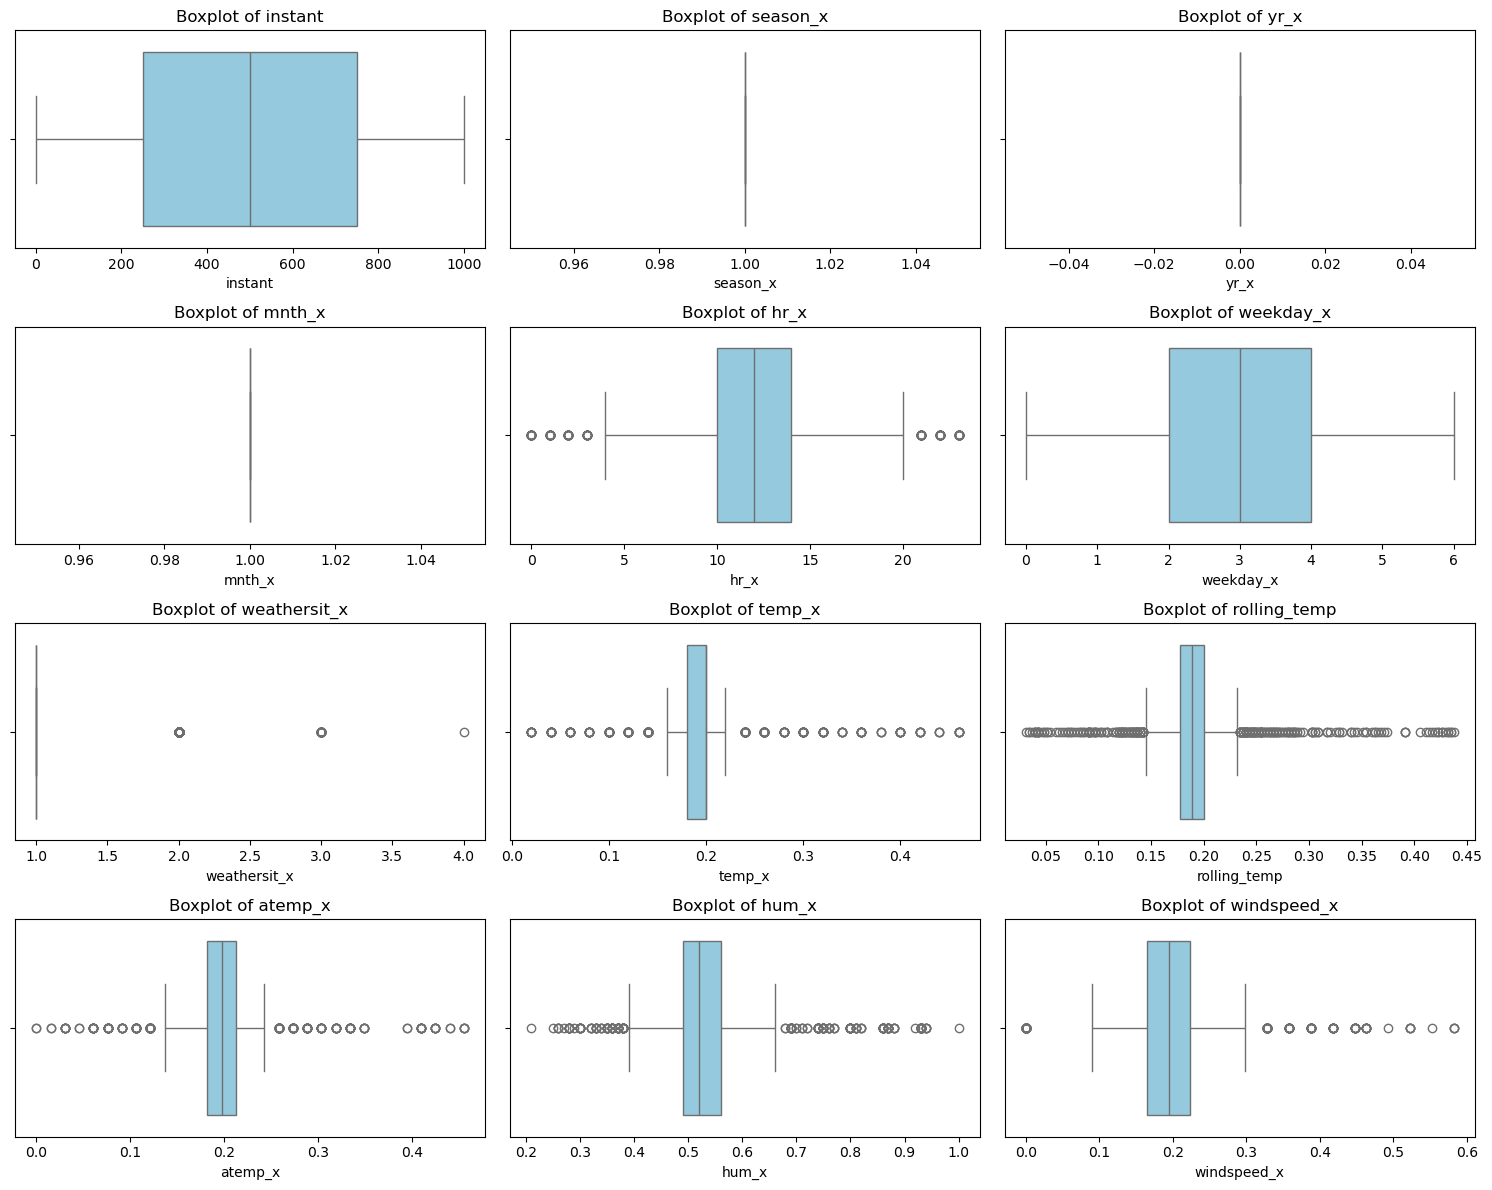

In [68]:
# Visualize outliers with boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(numeric_cols[:12], 1):  # Plot only the first 12 columns
    plt.subplot(4, 3, i)
    sns.boxplot(x=combined_df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()




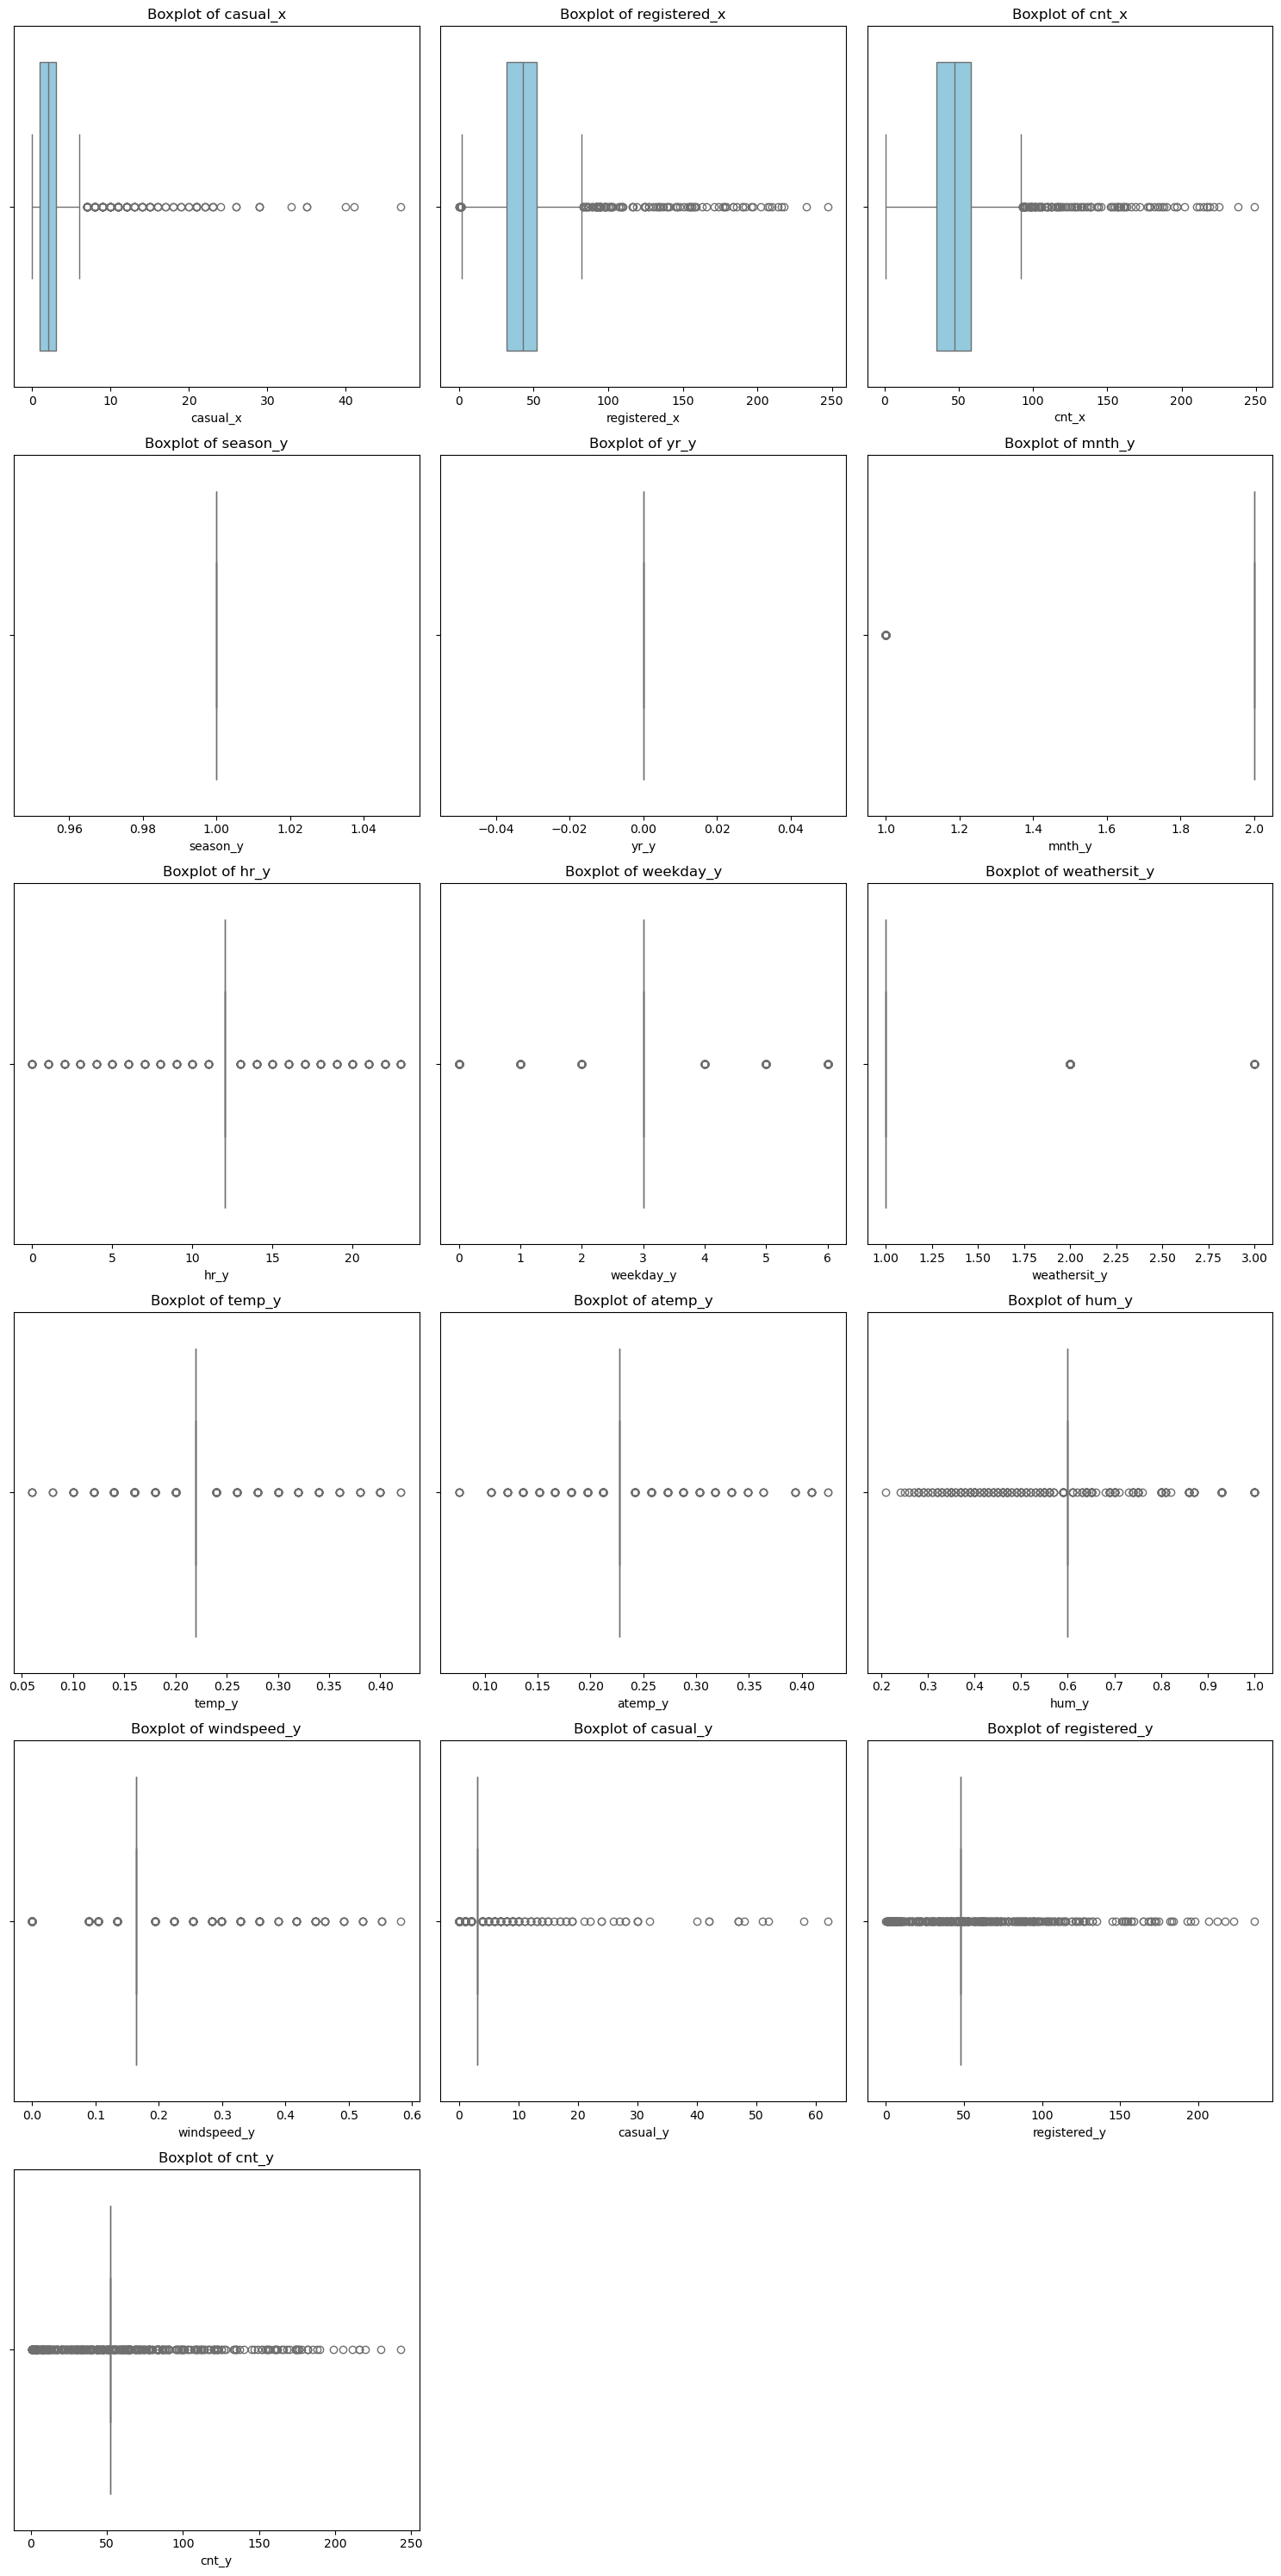

In [30]:
# Visualize outliers with boxplots
import math

# Define the range of columns for the next set
columns_to_plot = numeric_cols[12:33]  # Columns 13 to 33 (index 12 to 32)
n_cols = len(columns_to_plot)  # Number of columns to plot

# Dynamically calculate grid size
n_rows = math.ceil(n_cols / 3)  # 3 columns per row

# Create the figure
plt.figure(figsize=(15, 5 * n_rows))

# Iterate over the columns
for i, col in enumerate(columns_to_plot, 1):
    plt.subplot(n_rows, 3, i)  # Dynamically assign subplot grid
    sns.boxplot(x=combined_df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")

# Adjust layout and show the figure
plt.tight_layout()
plt.show()



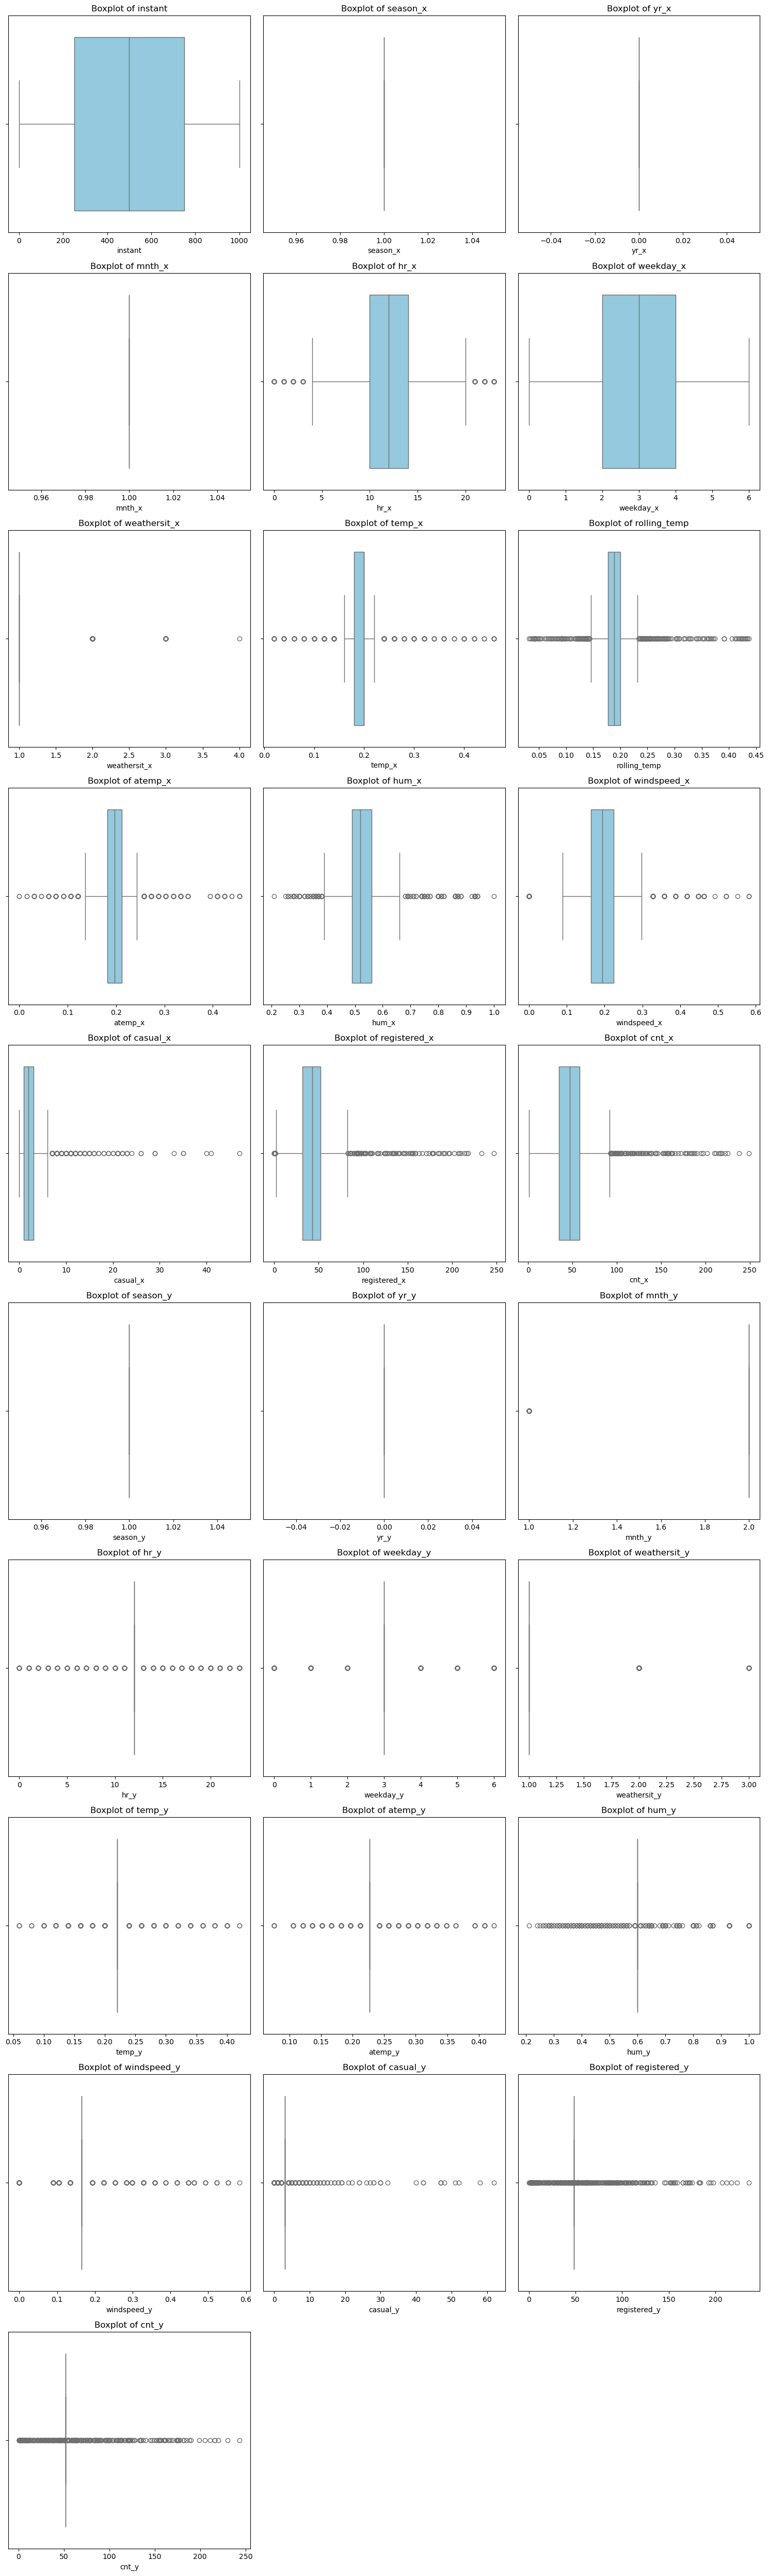

In [32]:
import math

# Calculate grid size
n_cols = len(numeric_cols)  # Total number of columns to plot
n_rows = math.ceil(n_cols / 3)  # Number of rows for 3 columns per row

# Create the figure
plt.figure(figsize=(15, 5 * n_rows))  # Adjust height dynamically

# Plot each column in a subplot
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 3, i)  # Adjust subplot position dynamically
    sns.boxplot(x=combined_df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


# Define the IQR-based capping function

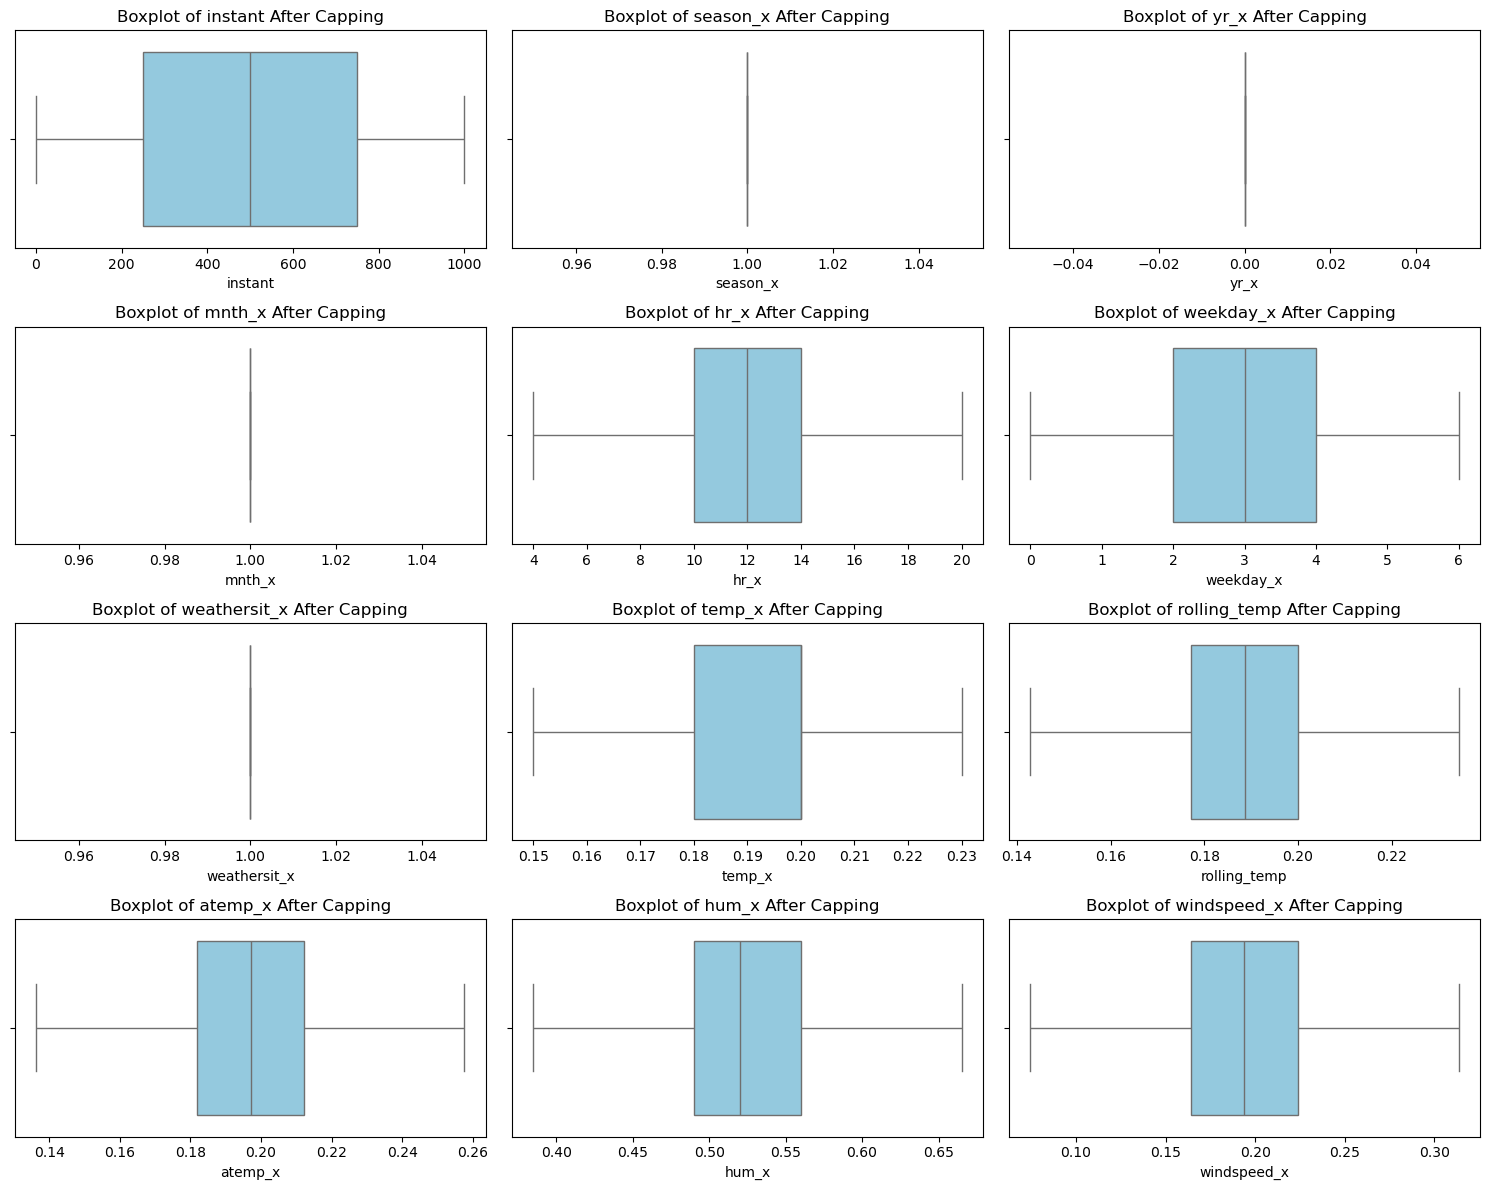

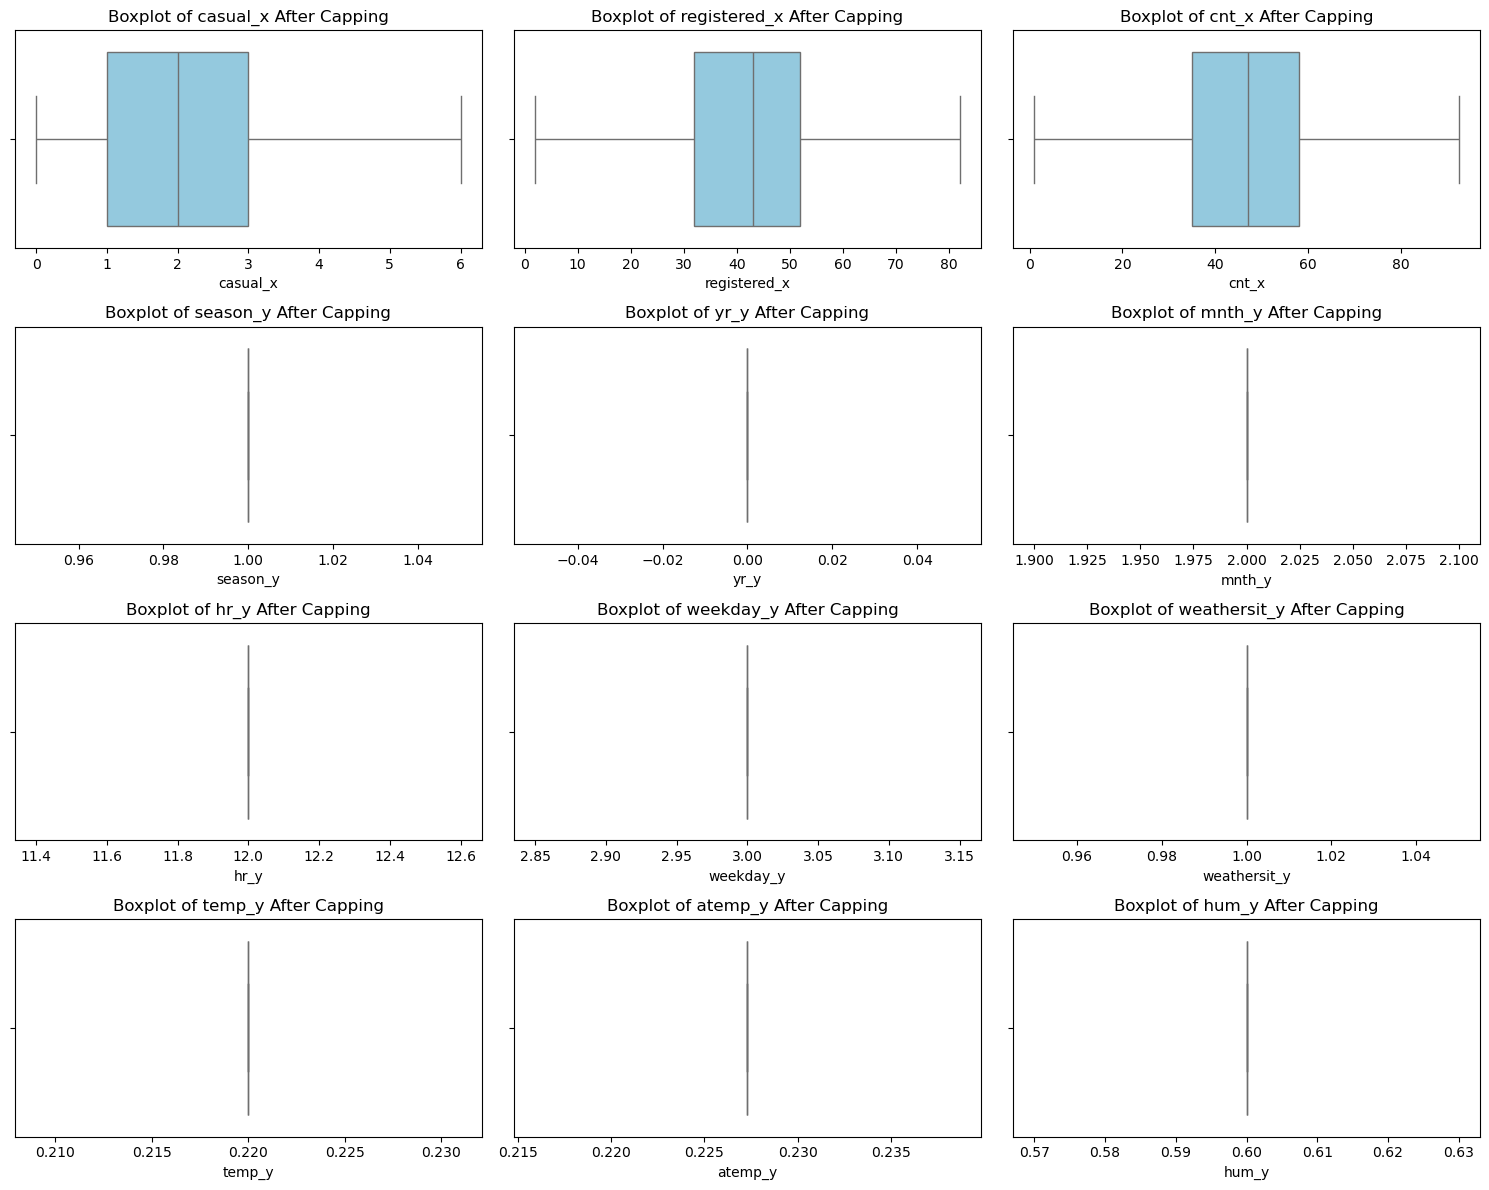

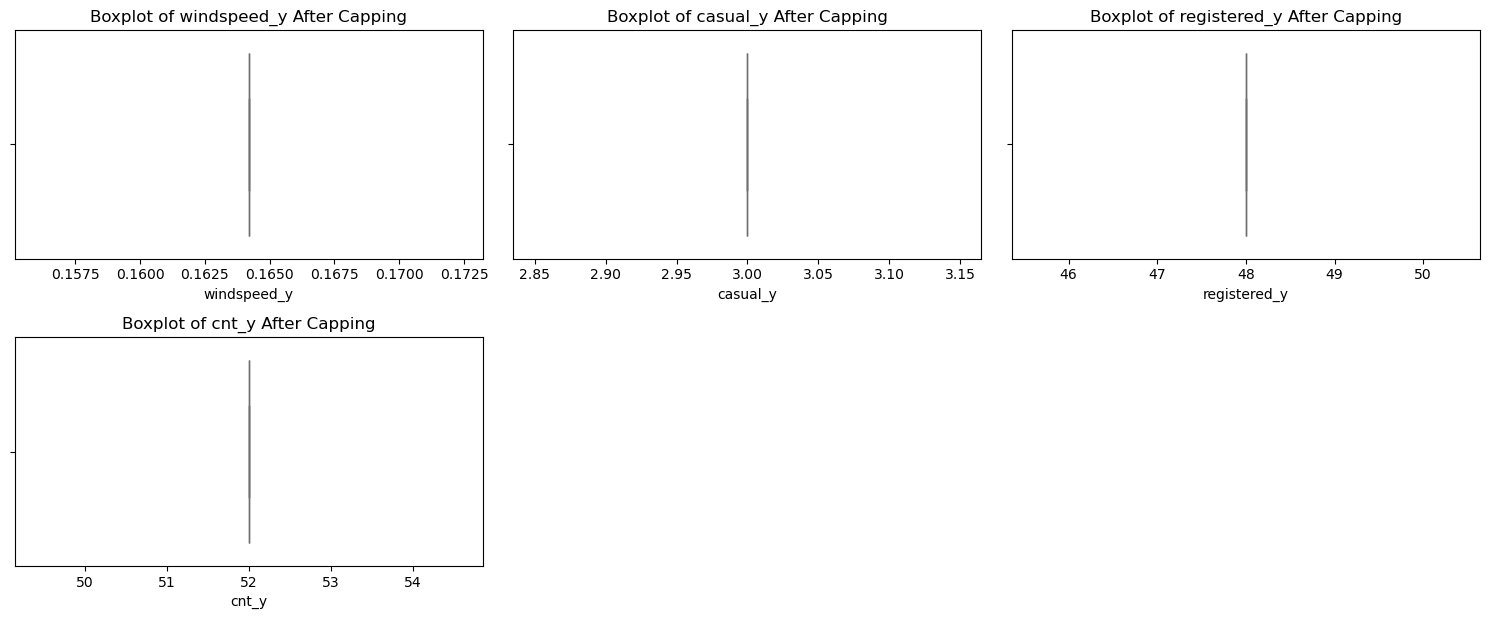

In [34]:
# Define the IQR-based capping function
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply capping to numeric columns
for col in numeric_cols:
    combined_df[col] = cap_outliers(combined_df[col])

# Split numeric_cols into chunks of 12
chunk_size = 12
chunks = [numeric_cols[i:i + chunk_size] for i in range(0, len(numeric_cols), chunk_size)]

# Plot each chunk in a separate figure
for chunk in chunks:
    plt.figure(figsize=(15, 12))
    for i, col in enumerate(chunk, 1):
        plt.subplot(4, 3, i)
        sns.boxplot(x=combined_df[col], color='skyblue')
        plt.title(f"Boxplot of {col} After Capping")
    plt.tight_layout()
    plt.show()



In [95]:
from scipy.stats import zscore

# Calculate Z-scores and filter out rows
z_scores = combined_df[numeric_cols].apply(zscore)
filtered_df = combined_df[(z_scores < 3).all(axis=1)]

print(f"Shape before removing outliers: {combined_df.shape}")
print(f"Shape after removing outliers: {filtered_df.shape}")


Shape before removing outliers: (1000, 33)
Shape after removing outliers: (0, 33)


# Define the IQR-based capping function

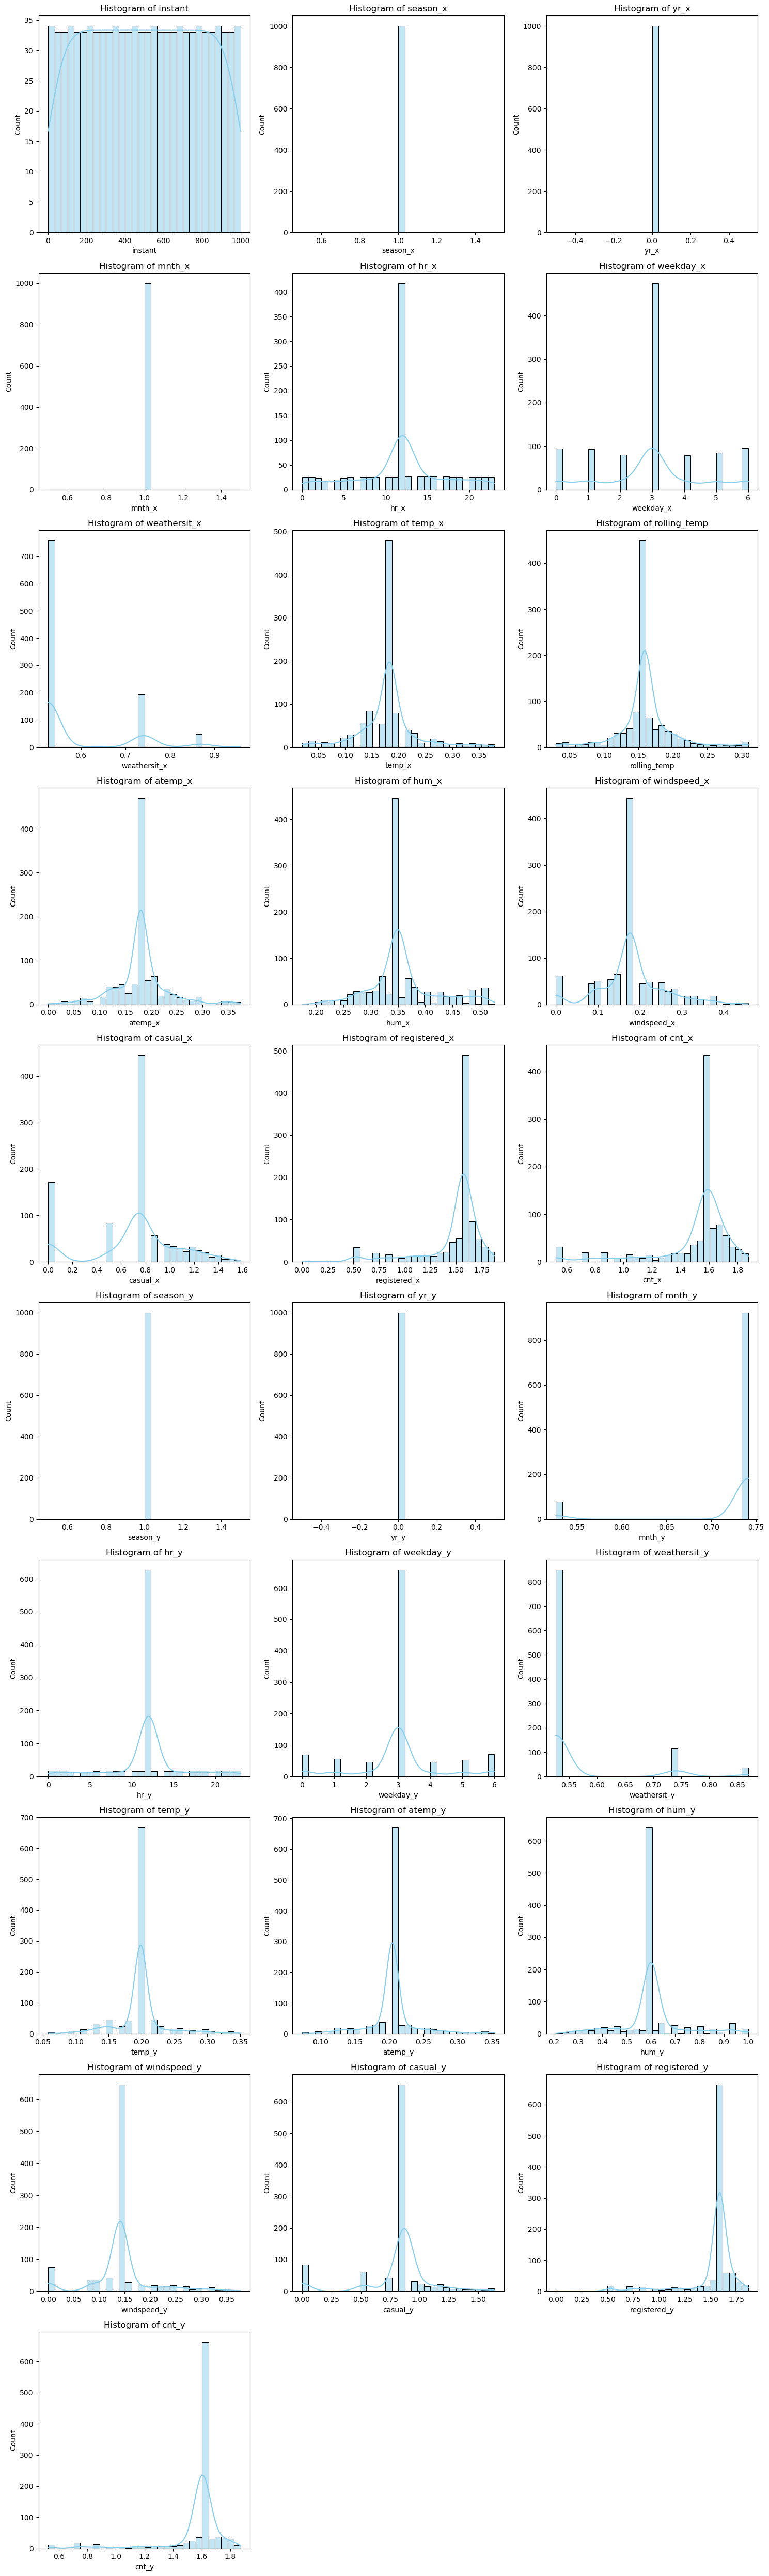

In [109]:
import math

# Calculate grid size dynamically
n_cols = len(numeric_cols)
n_rows = math.ceil(n_cols / 3)  # Number of rows for 3 columns per row

# Plot histograms dynamically
plt.figure(figsize=(15, 5 * n_rows))  # Adjust height dynamically
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 3, i)  # Dynamically assign subplot positions
    sns.histplot(combined_df[col], kde=True, color='skyblue', bins=30)
    plt.title(f"Histogram of {col}")
plt.tight_layout()
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_23016\2781938472.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df[col], shade=True, color='skyblue')
C:\Users\user\AppData\Local\Temp\ipykernel_23016\2781938472.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(combined_df[col], shade=True, color='skyblue')
C:\Users\user\AppData\Local\Temp\ipykernel_23016\2781938472.py:16: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(combined_df[col], shade=True, color='skyblue')
C:\Users\user\AppData\Local\Temp\ipykernel_23016\2781938472.py:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data

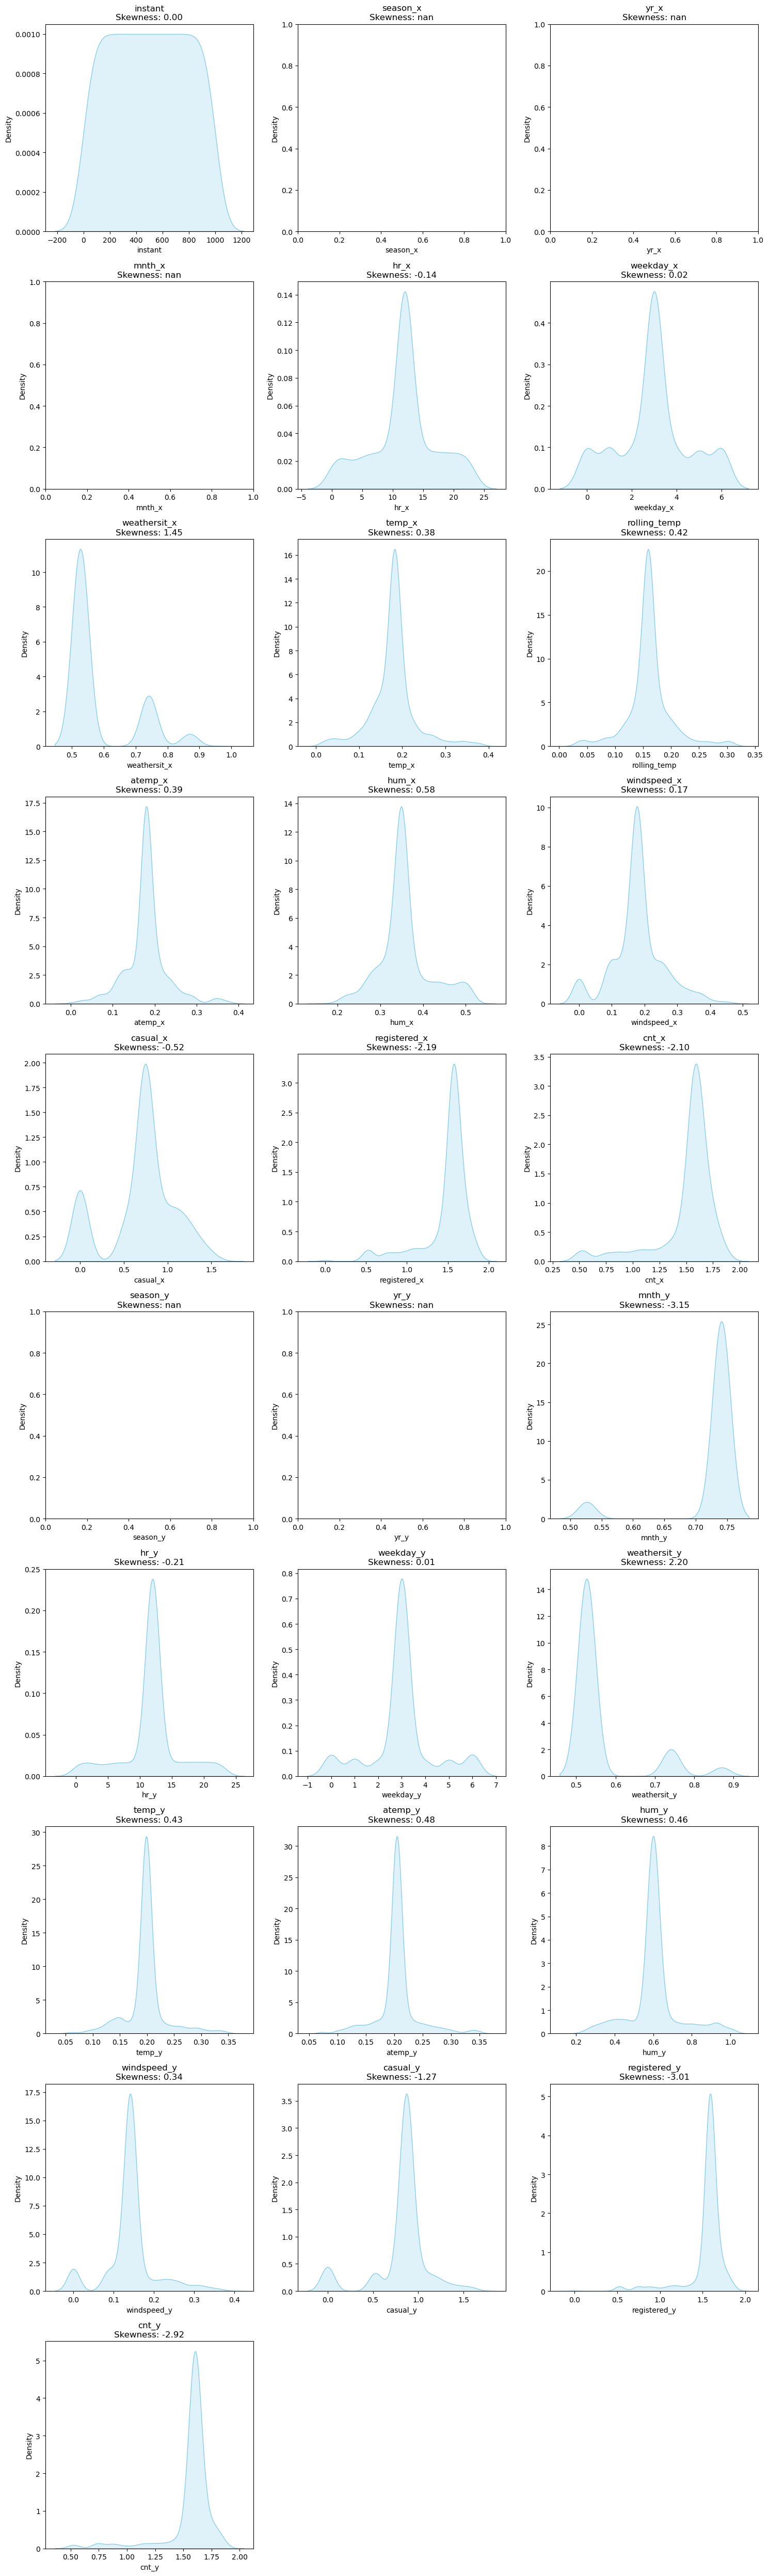

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import math

# Calculate grid size dynamically
n_cols = len(numeric_cols)  # Total number of columns to plot
n_rows = math.ceil(n_cols / 3)  # Number of rows for 3 columns per row

# Create figure
plt.figure(figsize=(15, 5 * n_rows))  # Adjust height dynamically

# Plot density plots with skewness values
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, 3, i)  # Assign subplot position dynamically
    sns.kdeplot(combined_df[col], shade=True, color='skyblue')
    
    # Calculate skewness and display in the title
    skew_value = skew(combined_df[col].dropna())  # Drop missing values for skewness calculation
    plt.title(f"{col}\nSkewness: {skew_value:.2f}")

plt.tight_layout()
plt.show()


In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

# Analyze skewness
numerical_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
skewness = combined_df[numerical_cols].apply(lambda x: skew(x.dropna()))

# Display skewness
print("Skewness of Numerical Columns:")
print(skewness)

# Apply transformations for skewed columns
skewed_cols = skewness[abs(skewness) > 0.5].index  # Columns with significant skewness
for col in skewed_cols:
    combined_df[col] = np.log1p(combined_df[col])  # Log transform (log(x+1))


Skewness of Numerical Columns:
instant         0.000000
season_x             NaN
yr_x                 NaN
mnth_x               NaN
hr_x           -0.136797
weekday_x       0.016977
weathersit_x    1.448064
temp_x          0.383971
rolling_temp    0.415686
atemp_x         0.390054
hum_x           0.583031
windspeed_x     0.165587
casual_x       -0.521041
registered_x   -2.193549
cnt_x          -2.096075
season_y             NaN
yr_y                 NaN
mnth_y         -3.147239
hr_y           -0.211016
weekday_y       0.009779
weathersit_y    2.203920
temp_y          0.430327
atemp_y         0.480854
hum_y           0.455363
windspeed_y     0.344986
casual_y       -1.272533
registered_y   -3.007737
cnt_y          -2.915219
dtype: float64


# Compute correlation matrix

In [101]:
# Compute correlation matrix
correlation_matrix = combined_df[numerical_cols].corr()

# Display correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)




Correlation Matrix:
               instant  season_x  yr_x  mnth_x      hr_x  weekday_x  \
instant       1.000000       NaN   NaN     NaN  0.027866   0.013256   
season_x           NaN       NaN   NaN     NaN       NaN        NaN   
yr_x               NaN       NaN   NaN     NaN       NaN        NaN   
mnth_x             NaN       NaN   NaN     NaN       NaN        NaN   
hr_x          0.027866       NaN   NaN     NaN  1.000000  -0.021657   
weekday_x     0.013256       NaN   NaN     NaN -0.021657   1.000000   
weathersit_x -0.303457       NaN   NaN     NaN -0.068293   0.060249   
temp_x       -0.110860       NaN   NaN     NaN  0.170823   0.040522   
rolling_temp -0.191545       NaN   NaN     NaN  0.079539   0.061047   
atemp_x      -0.131842       NaN   NaN     NaN  0.115439   0.104315   
hum_x        -0.066628       NaN   NaN     NaN -0.202939   0.064739   
windspeed_x  -0.034197       NaN   NaN     NaN  0.132047  -0.128031   
casual_x      0.052719       NaN   NaN     NaN  0.349003 

Correlation values range from -1 (negative correlation) to +1 (positive correlation). Values close to 0 indicate no correlation.


# Visualize with heatmap

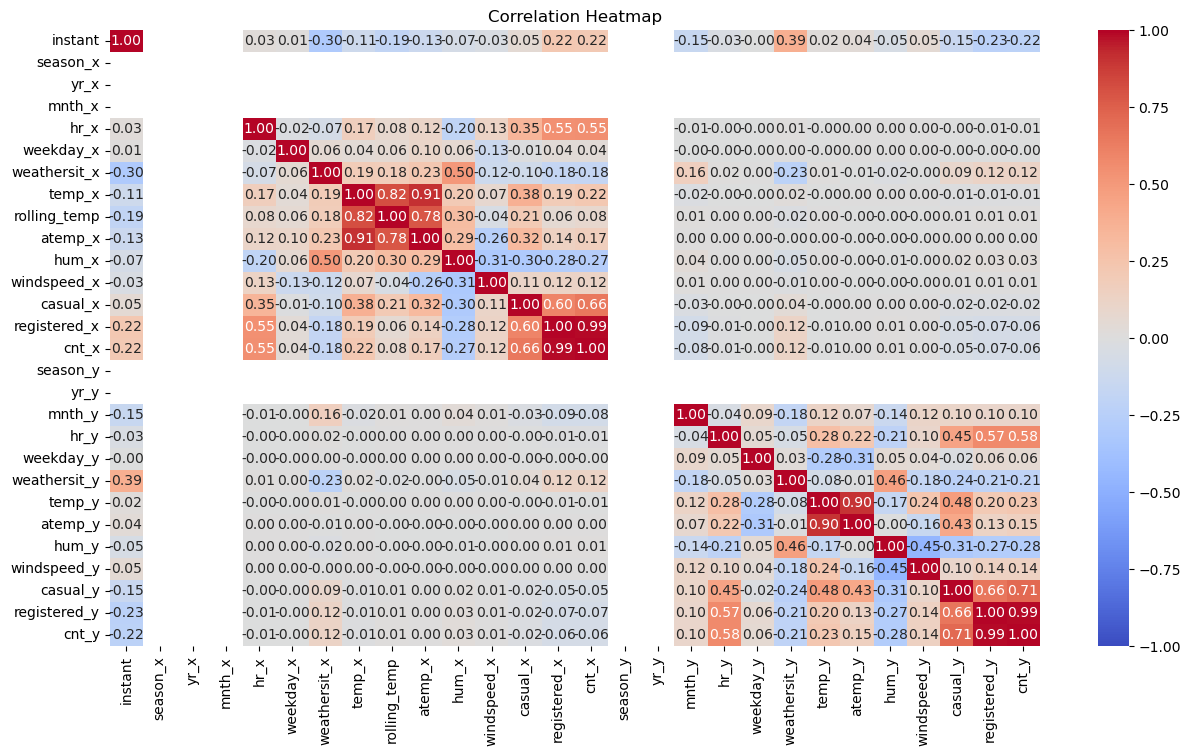

In [85]:
# Visualize with heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

Insights from the Heatmap

Strong Correlations:
Variables with correlations close to 1 or -1 are highly dependent.
Example: temp_x and cnt_x might have a high correlation (e.g., 0.6 or above).
Weak or No Correlations:
Variables with correlations close to 0 are likely independent.
Multicollinearity:
If two independent variables have a high correlation (e.g., temp_x and atemp_x), this can cause issues in regression models.

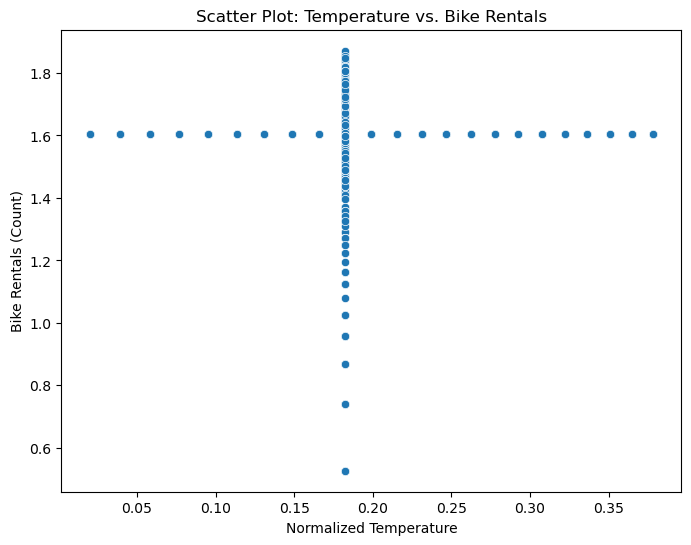

In [89]:
# Scatter plot between two key attributes
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp_x', y='cnt_y', data=combined_df)
plt.title("Scatter Plot: Temperature vs. Bike Rentals")
plt.xlabel("Normalized Temperature")
plt.ylabel("Bike Rentals (Count)")
plt.show()


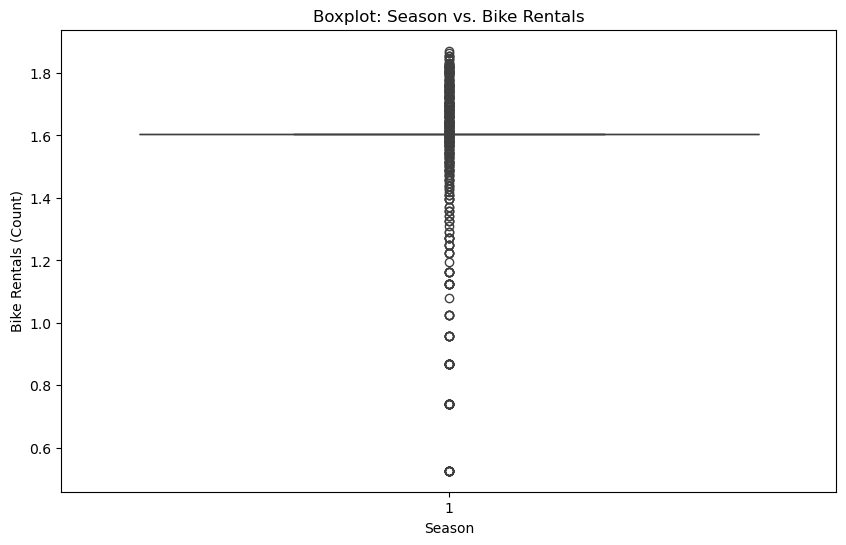

In [93]:
# Boxplot for categorical vs numerical analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='season_x', y='cnt_y', data=combined_df)
plt.title("Boxplot: Season vs. Bike Rentals")
plt.xlabel("Season")
plt.ylabel("Bike Rentals (Count)")
plt.show()
